<a href="https://colab.research.google.com/github/uzdanska/Machine-Learning/blob/main/supervised/01_basics/02_missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### scikit-learn

Strona biblioteki: https://scikit-learn.org

Dokumentacja/User Guide: https://scikit-learn.org/stable/user_guide.html

Podstawowa biblioteka do uczenia maszynowego w języku Python.

Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install scikit-learn

```
Aby zaktualizować do najnowszej wersji bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install --upgrade scikit-learn
```
Kurs stworzony w oparciu o wersję 0.22.1

### Preprocessing danych:


1.   [Import bibliorek](#0)
2.   [Wygenerowanie danych](#1)
3.   [Utworzenie kopii danych](#2)
4.   [Sprawdzenie braków](#3)
5.   [Uzupełnienie braków - SimpleImputer](#4)
6.   [Braki danych w szeregach czasowych](#5)

### <a name="0"></a> 1. Import bibliotek

In [3]:
import numpy as np
import pandas as pd
import sklearn

sklearn.__version__

'1.2.2'

### <a name="1"></a> 2. Wygenerowanie

In [23]:
data = {
    'size': ['XL', 'L', 'M', np.nan, 'XS', 'M'],
    'color': ['red', 'blue', 'blue', 'white', 'red', 'white'],
    'gender': ['female', 'male', np.nan, 'female', 'female', 'male'],
    'price': [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    'weight': [500, 450, 300, np.nan, 410, np.nan],
    'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']
}

df_raw = pd.DataFrame(data = data)
df_raw

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,blue,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,white,female,129.0,NaN,no
4,XS,red,female,79.0,410.0,yes
5,M,white,male,89.0,NaN,no


### <a name="2"></a> 3. Utworzenie kopii danych

In [24]:
df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   6 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  4 non-null      float64
 5   bought  6 non-null      object 
dtypes: float64(2), object(4)
memory usage: 416.0+ bytes


### <a name="3"></a> 4. Sprawdzenie braków

In [25]:
df.isnull()

,size,color,gender,price,weight,bought
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,True,False,False,False,True,False
4,False,False,False,False,False,False
5,False,False,False,False,True,False


Sprawdzenie liczby braków danych w każdej kolumnie

In [26]:
df.isnull().sum()

size      1
color     0
gender    1
price     1
weight    2
bought    0
dtype: int64

Łączna liczba braków danych w DataFrame

In [27]:
df.isnull().sum().sum()

5

Procent braków danych w poszczególnych zmiennych

In [28]:
df.isnull().sum() / len(df)

size      0.166667
color     0.000000
gender    0.166667
price     0.166667
weight    0.333333
bought    0.000000
dtype: float64

Możemy działać na poszczególnych zmiennych, kolumnę

In [30]:
pd.isnull(df['weight'])

0    False
1    False
2    False
3     True
4    False
5     True
Name: weight, dtype: bool

Zwrócenie wierszy tam gdzię w kolumnie weight są braki danych

In [31]:
df[pd.isnull(df['weight'])]

,size,color,gender,price,weight,bought
3,NaN,white,female,129.0,NaN,no
5,M,white,male,89.0,NaN,no


Zwracanie wszystkich wierszy tam gdzie nie występują braki danych w kolumnie weight

In [32]:
df[~pd.isnull(df['weight'])]

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,blue,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,XS,red,female,79.0,410.0,yes


Zwróci wartość True jeśli dane tam są, False jeśli ich nie ma

In [33]:
pd.notnull(df['weight'])

0     True
1     True
2     True
3    False
4     True
5    False
Name: weight, dtype: bool

Zwraca wiersze tam gdzie w kolumnie weight nie ma braków danych

In [34]:
df[pd.notnull(df['weight'])]

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,blue,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,XS,red,female,79.0,410.0,yes


Zwraca wiersze tam gdzie w kolumnie weight są braki danych

In [35]:
df[~pd.notnull(df['weight'])]

,size,color,gender,price,weight,bought
3,NaN,white,female,129.0,NaN,no
5,M,white,male,89.0,NaN,no


### <a name="4"></a> 5. Uzupełnienie braków - SimpleImputer

In [12]:
df[['weight']]

,weight
0,500.0
1,450.0
2,300.0
3,NaN
4,410.0
5,NaN


##### 5.1. Strategia średnia

In [10]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer.fit(df[['weight']])

SimpleImputer()

Wartość jaka została obliczona

In [13]:
imputer.statistics_

array([415.])

transformacja danych i dodanie do DataFrame

In [14]:
imputer.transform(df[['weight']])

array([[500.],
       [450.],
       [300.],
       [415.],
       [410.],
       [415.]])

In [15]:
df['weight'] = imputer.transform(df[['weight']])
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,blue,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,white,female,129.0,415.0,no
4,XS,red,female,79.0,410.0,yes
5,M,white,male,89.0,415.0,no


##### 5.2 Strategia wartość stała

###### Kolumna z cena, uzupełniona stałą wartością zmienne numeryczne

In [16]:
imputer = SimpleImputer(missing_values = np.nan, strategy="constant", fill_value=99.0)
imputer.fit_transform(df[['price']])

array([[199.],
       [ 89.],
       [ 99.],
       [129.],
       [ 79.],
       [ 89.]])

###### Kolumna z cena, uzupełniona stałą wartością zmienne kategoryczne

In [17]:
imputer = SimpleImputer(missing_values = np.nan, strategy="constant", fill_value="L")
imputer.fit_transform(df[['size']])

array([['XL'],
       ['L'],
       ['M'],
       ['L'],
       ['XS'],
       ['M']], dtype=object)

Obiekt DataFrame po zmianie, po nie przypisane zostały do obiektu:

In [18]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,blue,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,white,female,129.0,415.0,no
4,XS,red,female,79.0,410.0,yes
5,M,white,male,89.0,415.0,no


##### 5.3. Uzycie strategy="most_frequent" czyli najczęstszy element który występuje dla danej zmiennej

In [19]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,blue,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,white,female,129.0,415.0,no
4,XS,red,female,79.0,410.0,yes
5,M,white,male,89.0,415.0,no


In [20]:
imputer = SimpleImputer(missing_values = np.nan, strategy="most_frequent")
imputer.fit_transform(df[['size']])

array([['XL'],
       ['L'],
       ['M'],
       ['M'],
       ['XS'],
       ['M']], dtype=object)

Wartość NaN została uzupełniona 'M' ponieważ występiła ona najwięcej razy

##### 5.4 Metoda fillna


Uzupełnia wszystkie braki danych podaną wartością value

In [37]:
df.fillna(value="brak")

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,blue,male,89.0,450.0,no
2,M,blue,brak,brak,300.0,yes
3,brak,white,female,129.0,brak,no
4,XS,red,female,79.0,410.0,yes
5,M,white,male,89.0,brak,no


Ustawienie wartości numerycznej w przypadku braku danych

In [38]:
df.fillna(value=0.0)

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,blue,male,89.0,450.0,no
2,M,blue,0.0,0.0,300.0,yes
3,0.0,white,female,129.0,0.0,no
4,XS,red,female,79.0,410.0,yes
5,M,white,male,89.0,0.0,no


Uzupełnienie braku danych w poszczególnej kolumnie

ważne jest tutaj inplace=True zmiany na kolumnie

In [40]:
df['size'].fillna(value="L", inplace = True)
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,blue,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,L,white,female,129.0,NaN,no
4,XS,red,female,79.0,410.0,yes
5,M,white,male,89.0,NaN,no


Usunać wszystkie wiersze gdzie występuje brak danych

In [41]:
df.dropna()

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,blue,male,89.0,450.0,no
4,XS,red,female,79.0,410.0,yes


Możliwe jest usunięcie np wartości wiersza gdzie występuje więcej niż dwa braki danych

In [49]:
df = df.dropna(axis=1, thresh=2)
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,blue,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,L,white,female,129.0,NaN,no
4,XS,red,female,79.0,410.0,yes
5,M,white,male,89.0,NaN,no


In [47]:
df = df.dropna()
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,blue,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,L,white,female,129.0,NaN,no
4,XS,red,female,79.0,410.0,yes
5,M,white,male,89.0,NaN,no


### 6. Brak danych w szeregach czasowych

In [50]:
data = {'price': [108, 109, 110, 110, 109, np.nan, np.nan, 112, 111, 111]}
date_range = pd.date_range(start='01-01-2020 09:00', end='01-01-2020 18:00', periods=10)

df = pd.DataFrame(data=data, index=date_range)
df

,price
2020-01-01 09:00:00,108.0
2020-01-01 10:00:00,109.0
2020-01-01 11:00:00,110.0
2020-01-01 12:00:00,110.0
2020-01-01 13:00:00,109.0
2020-01-01 14:00:00,NaN
2020-01-01 15:00:00,NaN
2020-01-01 16:00:00,112.0
2020-01-01 17:00:00,111.0
2020-01-01 18:00:00,111.0


Wykres braku danych

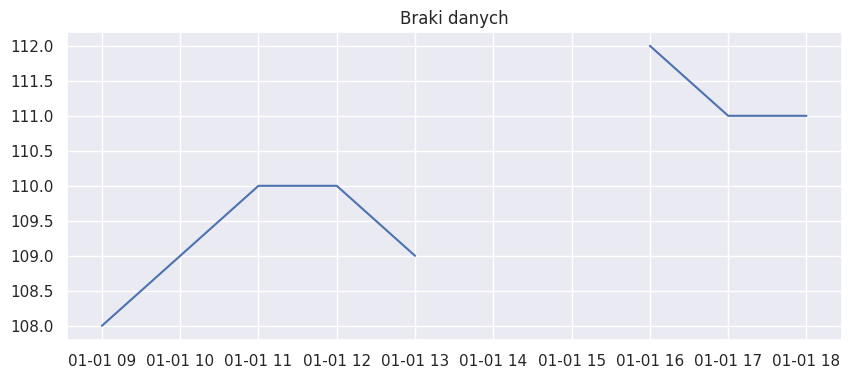

In [51]:
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns

register_matplotlib_converters()
sns.set()

plt.figure(figsize=(10, 4))
plt.title('Braki danych')
_ = plt.plot(df.price)

Ten sam wykres w plotly.express,

interaktywny wykres :)

In [53]:
import plotly.express as px

df_plotly = df.reset_index()
px.line(df_plotly, 'index', 'price', width=600, height=400,
        title="Szeregi czasowe - braki danych")

##### Usunięcie braków danych (dropna)

In [54]:
df_plotly = df_plotly.dropna()

px.line(df_plotly, 'index', 'price', width=600, height=400,
        title="Szeregi czasowe - braki danych")

##### Wypełnienie braków stałą wartość 0

In [59]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(value=0)
df_plotly

,index,price,price_fill
0,2020-01-01 09:00:00,108.0,108.0
1,2020-01-01 10:00:00,109.0,109.0
2,2020-01-01 11:00:00,110.0,110.0
3,2020-01-01 12:00:00,110.0,110.0
4,2020-01-01 13:00:00,109.0,109.0
5,2020-01-01 14:00:00,NaN,0.0
6,2020-01-01 15:00:00,NaN,0.0
7,2020-01-01 16:00:00,112.0,112.0
8,2020-01-01 17:00:00,111.0,111.0
9,2020-01-01 18:00:00,111.0,111.0


In [60]:
px.line(df_plotly, 'index', 'price_fill', width=600, height=400,
        title="Szeregi czasowe - braki danych - wstawianie stałej wartości 0")

##### Wypełnienie braków danych średnia

In [66]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(df_plotly['price'].mean())
df_plotly

,index,price,price_fill
0,2020-01-01 09:00:00,108.0,108.0
1,2020-01-01 10:00:00,109.0,109.0
2,2020-01-01 11:00:00,110.0,110.0
3,2020-01-01 12:00:00,110.0,110.0
4,2020-01-01 13:00:00,109.0,109.0
5,2020-01-01 14:00:00,NaN,110.0
6,2020-01-01 15:00:00,NaN,110.0
7,2020-01-01 16:00:00,112.0,112.0
8,2020-01-01 17:00:00,111.0,111.0
9,2020-01-01 18:00:00,111.0,111.0


In [67]:
px.line(df_plotly, 'index', 'price_fill', width=600, height=400,
        title="Szeregi czasowe - braki danych - uzupełnione wartością średnia")

##### Zastosowanie interpolacji **interpolate**

In [68]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].interpolate()
df_plotly

,index,price,price_fill
0,2020-01-01 09:00:00,108.0,108.0
1,2020-01-01 10:00:00,109.0,109.0
2,2020-01-01 11:00:00,110.0,110.0
3,2020-01-01 12:00:00,110.0,110.0
4,2020-01-01 13:00:00,109.0,109.0
5,2020-01-01 14:00:00,NaN,110.0
6,2020-01-01 15:00:00,NaN,111.0
7,2020-01-01 16:00:00,112.0,112.0
8,2020-01-01 17:00:00,111.0,111.0
9,2020-01-01 18:00:00,111.0,111.0


In [71]:
px.line(df_plotly, 'index', 'price_fill', width=600, height=400,
        title="Szeregi czasowe - braki danych - uzupełnione interpolacja")

##### Zastosowanie metody **backward fill**

In [70]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(method="bfill")
df_plotly

,index,price,price_fill
0,2020-01-01 09:00:00,108.0,108.0
1,2020-01-01 10:00:00,109.0,109.0
2,2020-01-01 11:00:00,110.0,110.0
3,2020-01-01 12:00:00,110.0,110.0
4,2020-01-01 13:00:00,109.0,109.0
5,2020-01-01 14:00:00,NaN,112.0
6,2020-01-01 15:00:00,NaN,112.0
7,2020-01-01 16:00:00,112.0,112.0
8,2020-01-01 17:00:00,111.0,111.0
9,2020-01-01 18:00:00,111.0,111.0


In [72]:
px.line(df_plotly, 'index', 'price_fill', width=600, height=400,
        title="Szeregi czasowe - braki danych - uzupełnione backward fill")